# TechAcademy Python Track 2022

First import pandas as this is what we are using for the Python track. We will also need datetime for some transformations later on.
The data set we ware using in this track is from Kaggle.

In [38]:
import pandas as pd
import numpy as np
import datetime

df = pd.read_csv(r'./ds-netflix-kaggle.csv', header=0).set_index(['show_id', 'title'])

# Glimpse into the data

Let's take a look into the data set. As we can see every entry has a id, missing Values are indicated by a "NaN" string. Besides the release year all data are recognized as 'object'.

In [2]:
df.head()

,,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,title,,,,,,,,,,
s1,Dick Johnson Is Dead,Movie,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,Blood & Water,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,Jailbirds New Orleans,TV Show,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,Kota Factory,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.dtypes

type            object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Some questions and tasks we should answer for the track:
    
    1. What is the longest movie included in the dataset? (movie **not** TV show)
    2. Which country realeased most content? (both movies and TV shows)
    3. How many movies and tv shows are included? Make a simple plot

First I decided to create two new data frames, one containing all movies and another one containing all TV shows, as having these stored may be handy later on. As an additional check I decided to compute the length of both data frames and to compare the sum to the length of the main data frame.

**Nota bene:**\
I'm not sure this is a good or clean solution, it should also be noted that this method does not represent the total number of movies and TV shows, as the computed length contains the header row.

In [4]:
movies = df.query("type == 'Movie'")
series = df.query("type == 'TV Show'")

dfN = len(df)
moviesN = len(movies)
seriesN = len(series)

print("Number of Movies:", moviesN)
print("Number of Series:", seriesN)
print("Total Entries:", dfN)

count = moviesN + seriesN
if not count == dfN:
    print("There is something wrong the numbers of rows don't match!")

Number of Movies: 6131
Number of Series: 2676
Total Entries: 8807


## Answers

**What is the longest _movie_ in the dataset?**

As we saw above the datatype for the duration is 'object', it is indicated as the number of minutes, e. g.: 90 min. Hence an integer and a string. After first looking into date and time formats I realized that what we actually want here is a timedelta. I also decided to use sort_values and head, instead of `max()` as I wanted to have some context. A alternative is to use nlargest, which basically wraps around sort_values and head, nonetheless I prefered this solution.

I decided to display the longest 20 movies and to display any missing values at the top in order to identify them. As we can see there are three Louis C.K. movies that have missing values, we may investigate this later on, when we start to clean the data. The longest movie in the dataset is Black Mirror Bandersnatch with more than 5 hours. As I saw the movie I know that it is an interactive movie and this may be the reason why it is so long. I decided to quickly check the second and third placed movies. Headspace, which is number two seems to be a personalized help for medidating or sleeping, which like Bandersnatch is very particular. Some conclusions:

If we want to investigate the duration we should maybe look closer at certain entries, maybe additional information like genre may be interesting and give additional insights.

In [5]:
print(pd.to_timedelta(movies["duration"]).sort_values(kind="mergesort", ascending=False, na_position="first").head(20))

movies["duration"].isnull().sum()

show_id  title                                             
s5542    Louis C.K. 2017                                                  NaT
s5795    Louis C.K.: Hilarious                                            NaT
s5814    Louis C.K.: Live at the Comedy Store                             NaT
s4254    Black Mirror: Bandersnatch                           0 days 05:12:00
s718     Headspace: Unwind Your Mind                          0 days 04:33:00
s2492    The School of Mischief                               0 days 04:13:00
s2488    No Longer kids                                       0 days 03:57:00
s2485    Lock Your Girls In                                   0 days 03:53:00
s2489    Raya and Sakina                                      0 days 03:50:00
s167     Once Upon a Time in America                          0 days 03:49:00
s7933    Sangam                                               0 days 03:48:00
s1020    Lagaan                                               0 days 03:44:00
s457

3

**Which country realeased most content? (both movies and TV shows)**

OK, I guess it is the US, anyways let's check it, we just need to count the occurences of the values in the country column, here are the 10 countries which released most content. And as I guessed the US is leading.

In [6]:
df["country"].value_counts().head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

**How many movies and tv shows are included? Make a simple plot**

Movie      6131
TV Show    2676
Name: type, dtype: int64


<AxesSubplot: title={'center': 'Number of movies and TV shows'}, xlabel='Content type', ylabel='Number of occurences'>

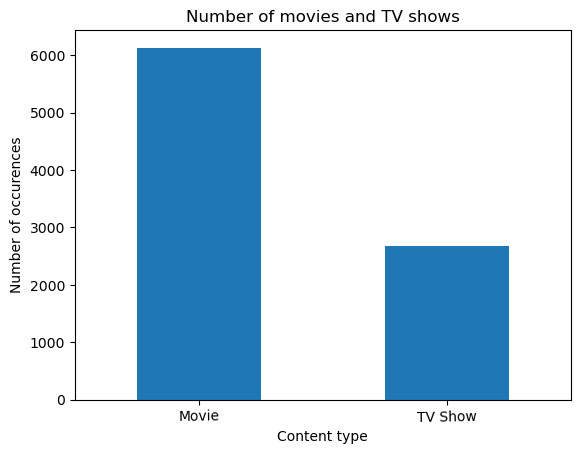

In [7]:
N = df["type"].value_counts()

print(N)
N.plot(kind="bar", title="Number of movies and TV shows", xlabel="Content type", ylabel="Number of occurences", rot=1)

<AxesSubplot: title={'center': 'Number of movies and TV shows'}>

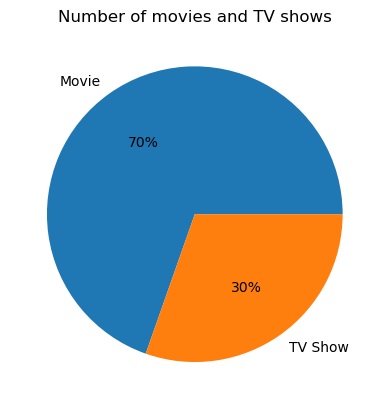

In [8]:
N.plot(kind="pie", title="Number of movies and TV shows", ylabel="", autopct='%1.0f%%')

# Data Cleaning

- fix date added
- fix release year
- Can you also fix the duration of the movies into a numeric format?
    On the concept of distribution, you should also try to compute the mean and standard deviation of the movie duration in minutes
    
    
**TO DO**
- Fix the warning issue: can't run the cell multiple times

In [9]:
df.date_added = pd.to_datetime(df.date_added)
df.release_year = pd.to_datetime(df.release_year, format="%Y")

In [10]:
# FIXME: I ignored the error for now as it works however I am not able to rerun the cell...
# default value is 'warn'
pd.options.mode.chained_assignment = None
movies["duration"] = pd.to_timedelta(movies["duration"])/pd.Timedelta('60s')

movieDurMean = movies["duration"].mean()
movieDurStd = movies["duration"].std()
print(movieDurMean)
print(movieDurStd)

99.57718668407311
28.290593447417347


In [11]:
movieDurMedian = movies["duration"].median()

round(movieDurMean)
round(movieDurStd)
print(movieDurMedian)

98.0


<AxesSubplot: title={'center': 'The 10 longest movies'}, xlabel='Duration in minutes'>

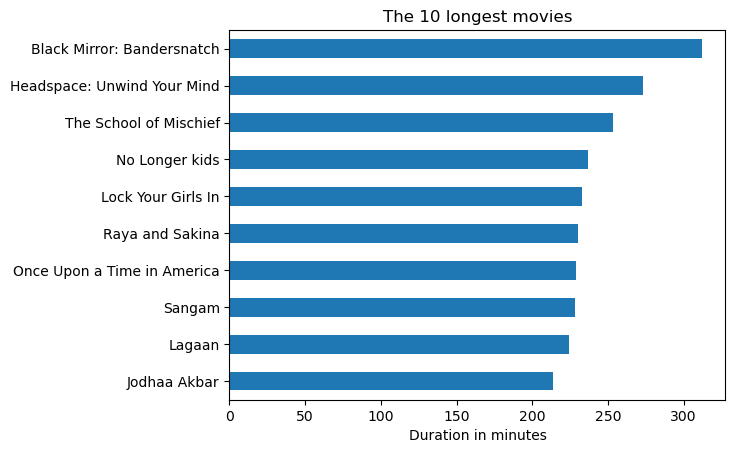

In [56]:
longestMovies = movies.duration.sort_values(kind="mergesort", ascending=False).head(10)
longestMovies.sort_values().reset_index().plot(kind="barh", title="The 10 longest movies", y="duration", x="title", ylabel="", legend=False, xlabel="Duration in minutes")

<AxesSubplot: title={'center': 'The 10 shortest movies'}, xlabel='Duration in minutes'>

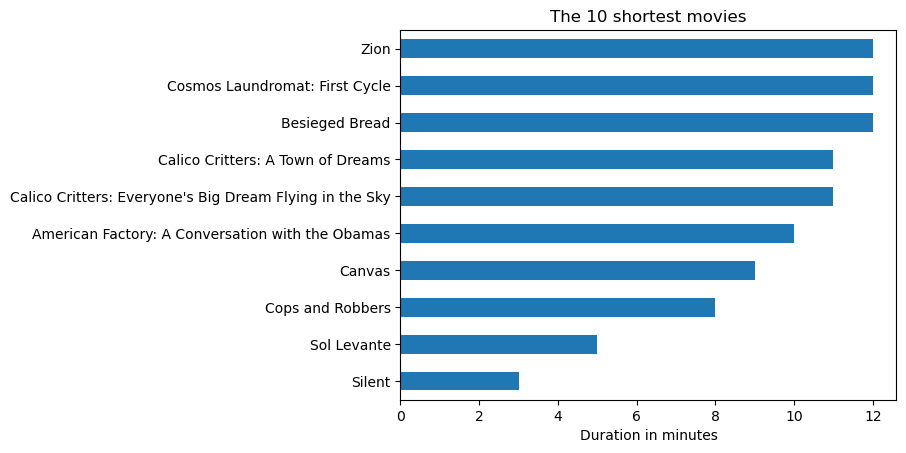

In [57]:
shortestMovies = movies.duration.sort_values(kind="mergesort", ascending=True).head(10)
shortestMovies.reset_index().plot(kind="barh", title="The 10 shortest movies", y="duration", x="title", ylabel="", legend=False, xlabel="Duration in minutes")

<AxesSubplot: title={'center': 'Movie duration over time'}, xlabel='Release year', ylabel='Average movie duration in minutes'>

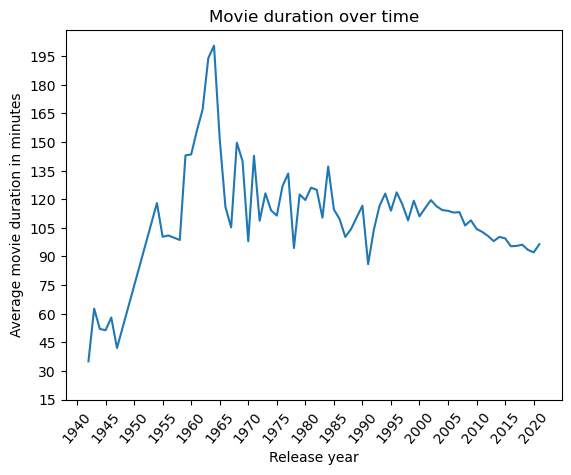

In [58]:
movies.groupby(['release_year']).mean(numeric_only=True).plot(title="Movie duration over time",
                                                              xlabel="Release year", 
                                                              ylabel="Average movie duration in minutes", 
                                                              legend=False, 
                                                              xticks=np.arange(start=1940, stop=2022, step=5), 
                                                              yticks=np.arange(start=15, stop=200, step=15), 
                                                              rot=50)